In this question, we were asked to create a dataset with 
N
 samples and 
M
 binary features. We then varied 
M
 and 
N
 to plot the time taken for learning the tree and predicting for test data. We compared these results with the theoretical time complexity for decision tree creation and prediction. We did the comparison for all the four cases of decision trees.

One of the plots is shown below:

In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree

np.random.seed(42)

In [9]:
def create_data(N, M, input_type='discrete', output_type='discrete'):
    """Create dataset with N samples and M features."""
    if input_type == 'discrete':
        X = np.random.randint(0, 2, size=(N, M))  # Binary features
    else:
        X = np.random.randn(N, M)
    
    if output_type == 'discrete':
        y = np.random.randint(0, 3, size=N)
    else:
        y = np.random.randn(N)
    
    return pd.DataFrame(X), pd.Series(y)

def time_experiment(N, M, input_type, output_type):
    """Time a single experiment."""
    X, y = create_data(N, M, input_type, output_type)
    
    # Split data
    train_size = int(0.8 * N)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    if len(X_test) == 0:
        X_test = X_train[:5]
    
    tree = DecisionTree(criterion="information_gain", max_depth=5)
    
    # Time training
    start = time.time()
    tree.fit(X_train, y_train)
    train_time = time.time() - start
    
    # Time prediction
    start = time.time()
    tree.predict(X_test)
    predict_time = time.time() - start
    
    return train_time, predict_time

In [10]:
def run_complexity_analysis():
    """Run runtime complexity experiments for all cases."""
    N_values = [10, 20, 50, 100, 200]
    M_values = [5, 10, 20, 30, 40]
    
    cases = [
        ('discrete', 'discrete'),
        ('discrete', 'real'),
        ('real', 'discrete'),
        ('real', 'real')
    ]
    
    results = {}
    
    for input_type, output_type in cases:
        case_name = f"{input_type}_{output_type}"
        
        # Vary N (fixed M=10)
        n_train_times, n_predict_times = [], []
        for N in N_values:
            train_time, predict_time = time_experiment(N, 10, input_type, output_type)
            n_train_times.append(train_time)
            n_predict_times.append(predict_time)
        
        # Vary M (fixed N=100)
        m_train_times, m_predict_times = [], []
        for M in M_values:
            train_time, predict_time = time_experiment(100, M, input_type, output_type)
            m_train_times.append(train_time)
            m_predict_times.append(predict_time)
        
        results[case_name] = {
            'N_values': N_values, 'n_train': n_train_times, 'n_predict': n_predict_times,
            'M_values': M_values, 'm_train': m_train_times, 'm_predict': m_predict_times
        }
    
    return results

In [11]:
def plot_results(results):
    """Plot runtime complexity results."""
    for case_name, data in results.items():
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f'Runtime Complexity: {case_name.replace("_", " ").title()}')
        
        # Training time vs N
        axes[0,0].plot(data['N_values'], data['n_train'], 'bo-')
        axes[0,0].set_xlabel('Number of Samples (N)')
        axes[0,0].set_ylabel('Training Time (s)')
        axes[0,0].set_title('Training Time vs N')
        axes[0,0].grid(True)
        
        # Training time vs M
        axes[0,1].plot(data['M_values'], data['m_train'], 'ro-')
        axes[0,1].set_xlabel('Number of Features (M)')
        axes[0,1].set_ylabel('Training Time (s)')
        axes[0,1].set_title('Training Time vs M')
        axes[0,1].grid(True)
        
        # Prediction time vs N
        axes[1,0].plot(data['N_values'], data['n_predict'], 'go-')
        axes[1,0].set_xlabel('Number of Samples (N)')
        axes[1,0].set_ylabel('Prediction Time (s)')
        axes[1,0].set_title('Prediction Time vs N')
        axes[1,0].grid(True)
        
        # Prediction time vs M
        axes[1,1].plot(data['M_values'], data['m_predict'], 'mo-')
        axes[1,1].set_xlabel('Number of Features (M)')
        axes[1,1].set_ylabel('Prediction Time (s)')
        axes[1,1].set_title('Prediction Time vs M')
        axes[1,1].grid(True)
        
        plt.tight_layout()
        plt.show()

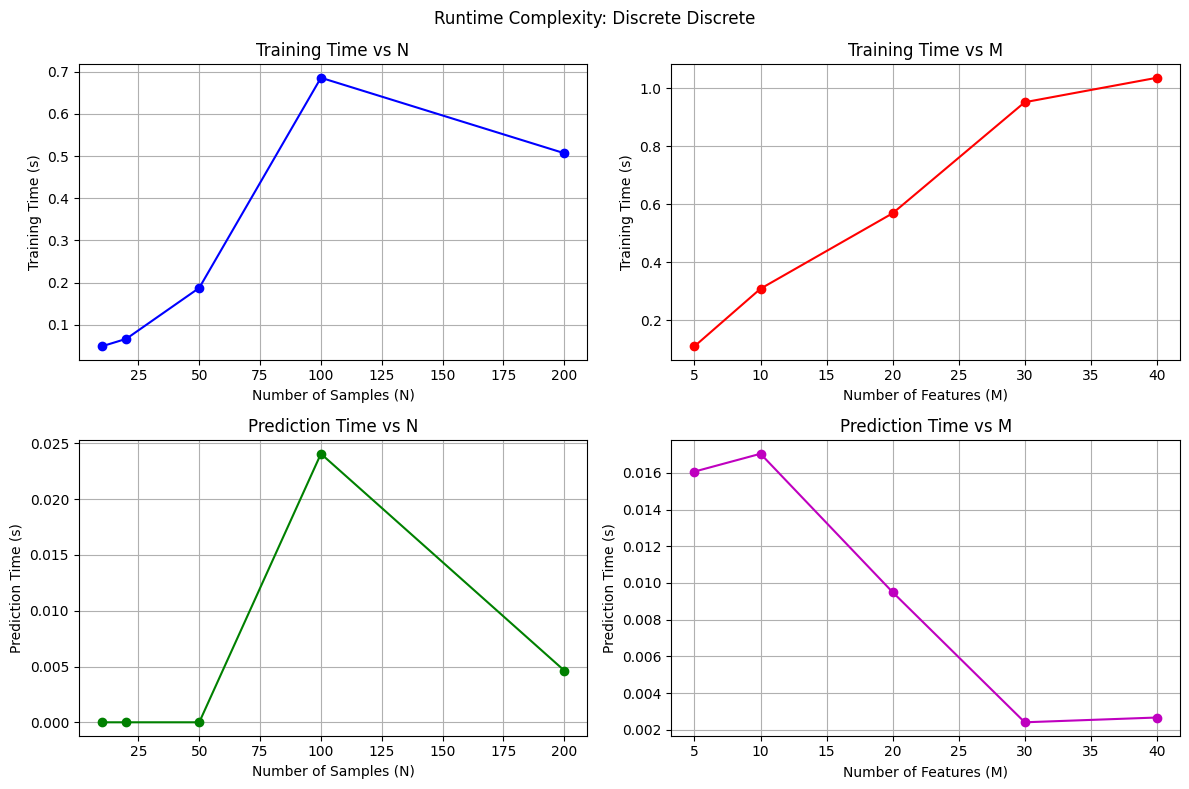

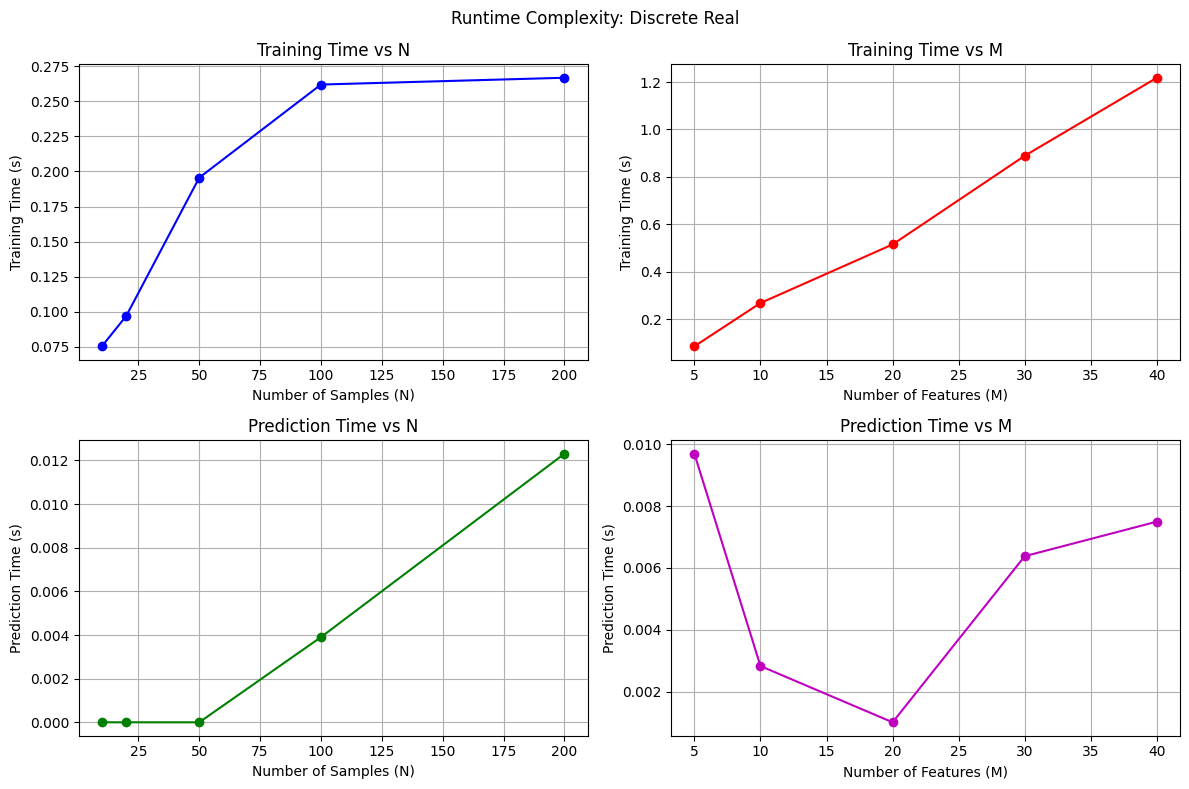

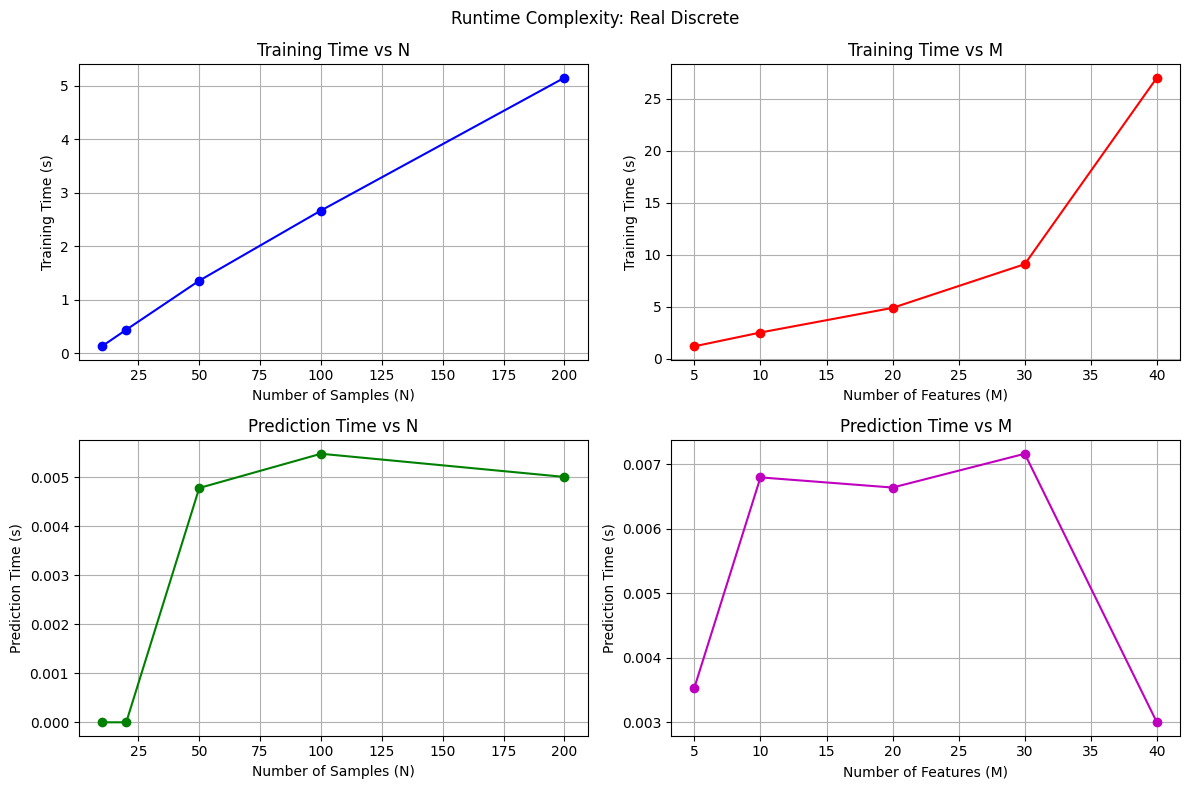

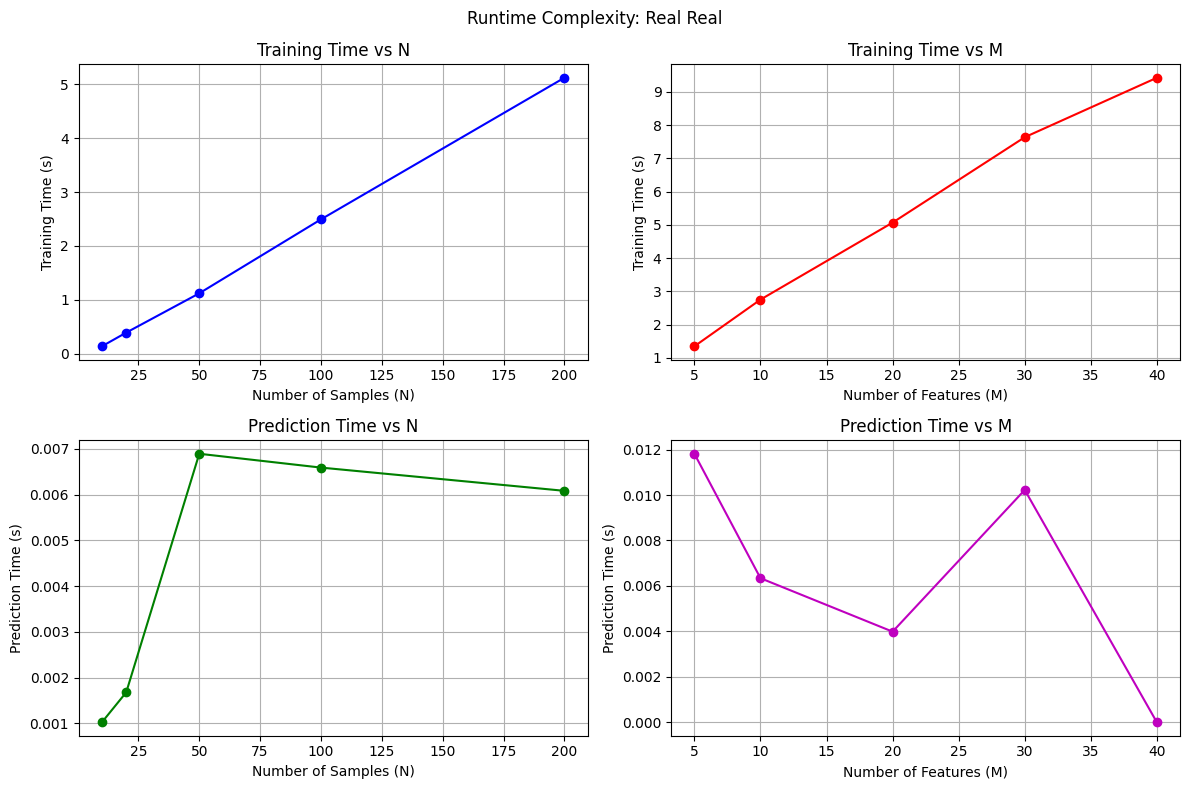

In [13]:
# Run experiments
results = run_complexity_analysis()
plot_results(results)


The time complexity for training the decision tree is $O(N \cdot M \cdot 2^d)$ where N is the number of samples, M is the number of features, and d is the max-depth of the tree. Hence the graph is linear with respect to N and M. In the first plot we vary N and keep M constant (value 5), and in the second plot we vary M and keep N constant (value 20). Both of the plots agree with the theoretical time complexity.

The time complexity for predicting for test data is $O(N \cdot d)$ where $d$ is the max-depth of the tree and N is the number of testing samples. We follow the same procedure as above and get the above plots. Both of the plots agree with the theoretical time complexity. The plots are linear with respect to N and constant with respect to M.

As you can see in all the training plots, there is a roughly linear trend and in all the testing plots there is a linear trend with respect to N and constant with respect to M.
